<a href="https://colab.research.google.com/github/Abhishek3102/ML/blob/main/Time_Series_Forecasting_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
!python -m pip install prophet


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/SMART_GRID_COMBINED.csv')

In [ ]:
df.head()

,date,p1,p2,p3,c1,c2,c3,stability
0,01-01-2019 01:00,0.859578,0.887445,0.958034,-0.782604,-1.257395,-1.723086,unstable
1,01-01-2019 02:00,0.862414,0.562139,0.781760,-1.940058,-1.872742,-1.255012,stable
2,01-01-2019 03:00,0.766689,0.839444,0.109853,-1.207456,-1.277210,-0.920492,unstable
3,01-01-2019 04:00,0.976744,0.929381,0.362718,-1.027473,-1.938944,-0.997374,unstable
4,01-01-2019 05:00,0.455450,0.656947,0.820923,-1.125531,-1.845975,-0.554305,unstable


In [ ]:
encoding = {
    'stable': 1,
    'unstable': 0
}

df['stability'] = df['stability'].map(encoding)

In [ ]:
df.head()

,date,p1,p2,p3,c1,c2,c3,stability
0,01-01-2019 01:00,0.859578,0.887445,0.958034,-0.782604,-1.257395,-1.723086,0
1,01-01-2019 02:00,0.862414,0.562139,0.781760,-1.940058,-1.872742,-1.255012,1
2,01-01-2019 03:00,0.766689,0.839444,0.109853,-1.207456,-1.277210,-0.920492,0
3,01-01-2019 04:00,0.976744,0.929381,0.362718,-1.027473,-1.938944,-0.997374,0
4,01-01-2019 05:00,0.455450,0.656947,0.820923,-1.125531,-1.845975,-0.554305,0


In [ ]:
df['stability'].value_counts()

,count
stability,
0,27936
1,15887


In [ ]:
df.isnull().sum()

,0
date,0
p1,0
p2,0
p3,0
c1,0
c2,0
c3,0
stability,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43823 entries, 0 to 43822
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43823 non-null  object 
 1   p1         43823 non-null  float64
 2   p2         43823 non-null  float64
 3   p3         43823 non-null  float64
 4   c1         43823 non-null  float64
 5   c2         43823 non-null  float64
 6   c3         43823 non-null  float64
 7   stability  43823 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,p1,p2,p3,c1,c2,c3,stability
count,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000,43823.000000
mean,0.524386,0.525091,0.524850,-1.250546,-1.249507,-1.249552,0.362527
std,0.274152,0.274024,0.274112,0.432717,0.433164,0.432663,0.480735
min,0.050028,0.050028,0.050028,-1.999945,-1.999945,-1.999945,0.000000
25%,0.287146,0.288137,0.287527,-1.624822,-1.625254,-1.624678,0.000000
50%,0.523687,0.524937,0.524818,-1.250468,-1.249347,-1.248716,0.000000
75%,0.761357,0.762186,0.762276,-0.876309,-0.873360,-0.875252,1.000000
max,0.999982,0.999982,0.999982,-0.500025,-0.500025,-0.500025,1.000000


In [ ]:
import pandas as pd

df['ds'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

print(df[['date', 'ds']])


                   date                  ds
0      01-01-2019 01:00 2019-01-01 01:00:00
1      01-01-2019 02:00 2019-01-01 02:00:00
2      01-01-2019 03:00 2019-01-01 03:00:00
3      01-01-2019 04:00 2019-01-01 04:00:00
4      01-01-2019 05:00 2019-01-01 05:00:00
...                 ...                 ...
43818  31-12-2023 19:00 2023-12-31 19:00:00
43819  31-12-2023 20:00 2023-12-31 20:00:00
43820  31-12-2023 21:00 2023-12-31 21:00:00
43821  31-12-2023 22:00 2023-12-31 22:00:00
43822  31-12-2023 23:00 2023-12-31 23:00:00

[43823 rows x 2 columns]


In [ ]:
df.head()

,date,p1,p2,p3,c1,c2,c3,stability,Year,Month,Day,parsed_date,ds
0,01-01-2019 01:00,0.859578,0.887445,0.958034,-0.782604,-1.257395,-1.723086,0,2019 01:00,01,01,2019 01:00-01-01,2019-01-01 01:00:00
1,01-01-2019 02:00,0.862414,0.562139,0.781760,-1.940058,-1.872742,-1.255012,1,2019 02:00,01,01,2019 02:00-01-01,2019-01-01 02:00:00
2,01-01-2019 03:00,0.766689,0.839444,0.109853,-1.207456,-1.277210,-0.920492,0,2019 03:00,01,01,2019 03:00-01-01,2019-01-01 03:00:00
3,01-01-2019 04:00,0.976744,0.929381,0.362718,-1.027473,-1.938944,-0.997374,0,2019 04:00,01,01,2019 04:00-01-01,2019-01-01 04:00:00
4,01-01-2019 05:00,0.455450,0.656947,0.820923,-1.125531,-1.845975,-0.554305,0,2019 05:00,01,01,2019 05:00-01-01,2019-01-01 05:00:00


In [ ]:
columns_to_drop = ['date', 'Year', 'Month', 'Day', 'parsed_date']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,p1,p2,p3,c1,c2,c3,stability,ds
0,0.859578,0.887445,0.958034,-0.782604,-1.257395,-1.723086,0,2019-01-01 01:00:00
1,0.862414,0.562139,0.781760,-1.940058,-1.872742,-1.255012,1,2019-01-01 02:00:00
2,0.766689,0.839444,0.109853,-1.207456,-1.277210,-0.920492,0,2019-01-01 03:00:00
3,0.976744,0.929381,0.362718,-1.027473,-1.938944,-0.997374,0,2019-01-01 04:00:00
4,0.455450,0.656947,0.820923,-1.125531,-1.845975,-0.554305,0,2019-01-01 05:00:00


In [ ]:
df = df.rename(columns={'stability': 'y'})

df['ds'] = pd.to_datetime(df['ds'])

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

future = m.make_future_dataframe(periods=24, freq='H')
forecast = m.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp296ew79a/5d378z5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp296ew79a/45ehm8vf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90788', 'data', 'file=/tmp/tmp296ew79a/5d378z5b.json', 'init=/tmp/tmp296ew79a/45ehm8vf.json', 'output', 'file=/tmp/tmp296ew79a/prophet_modelboulgoz8/prophet_model-20240827051956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
0     2019-01-01 01:00:00  0.365796   -0.595884    1.319726
1     2019-01-01 02:00:00  0.360876   -0.600057    1.329021
2     2019-01-01 03:00:00  0.358908   -0.589940    1.248238
3     2019-01-01 04:00:00  0.360450   -0.577152    1.309836
4     2019-01-01 05:00:00  0.363013   -0.567348    1.294839
...                   ...       ...         ...         ...
43842 2024-01-01 19:00:00  0.369079   -0.551649    1.241884
43843 2024-01-01 20:00:00  0.365553   -0.621420    1.276870
43844 2024-01-01 21:00:00  0.366284   -0.581567    1.361433
43845 2024-01-01 22:00:00  0.370330   -0.541491    1.289386
43846 2024-01-01 23:00:00  0.373783   -0.511624    1.284774

[43847 rows x 4 columns]


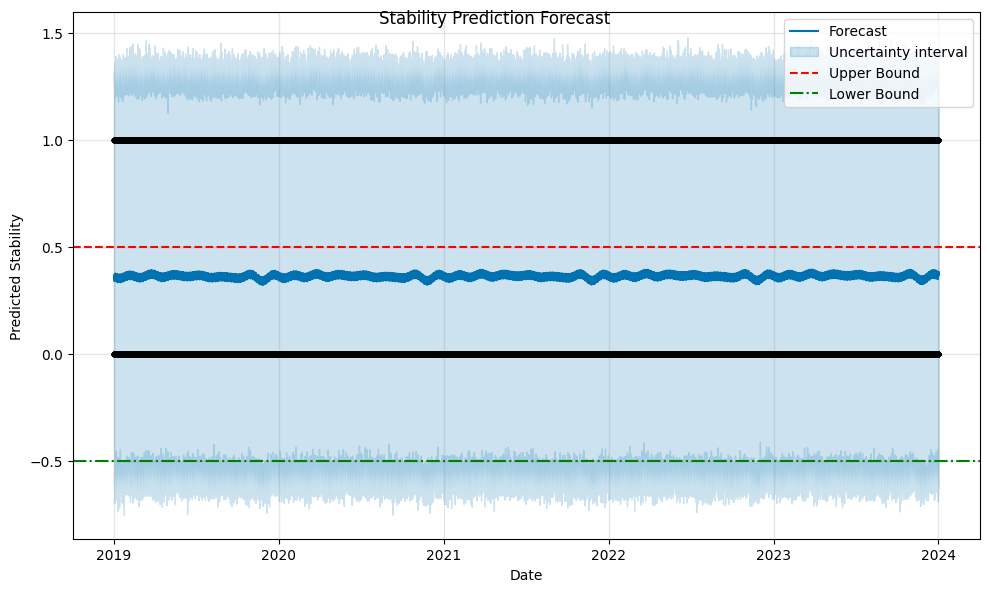

In [ ]:
import matplotlib.pyplot as plt
fig = m.plot(forecast)

fig.suptitle("Stability Prediction Forecast")
ax = fig.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Predicted Stability")

ax.axhline(y=0.5, color='r', linestyle='--', label='Upper Bound')
ax.axhline(y=-0.5, color='g', linestyle='-.', label='Lower Bound')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[1], handles[2], handles[-2], handles[-1]])
plt.show()


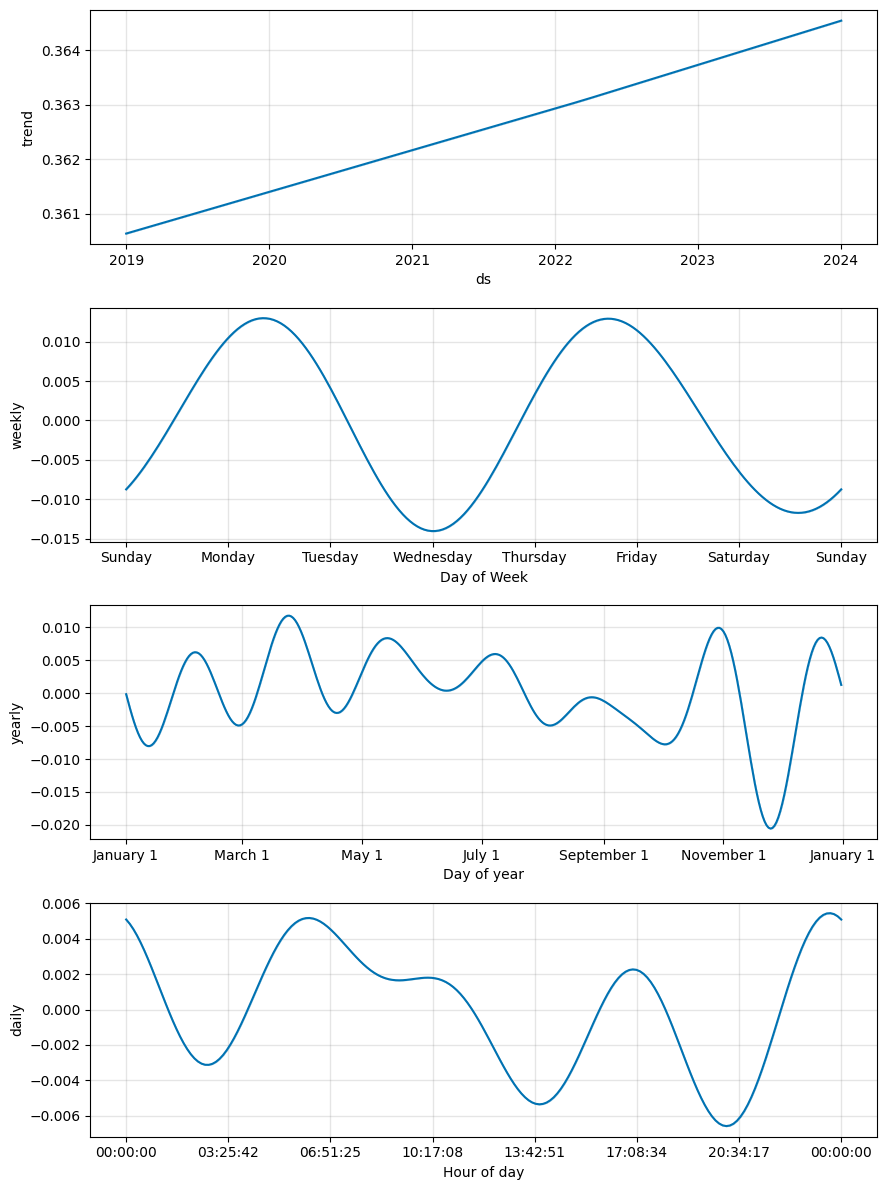

In [ ]:
plt2 = m.plot_components(forecast)

In [ ]:
df.columns

Index(['p1', 'p2', 'p3', 'c1', 'c2', 'c3', 'y', 'ds'], dtype='object')

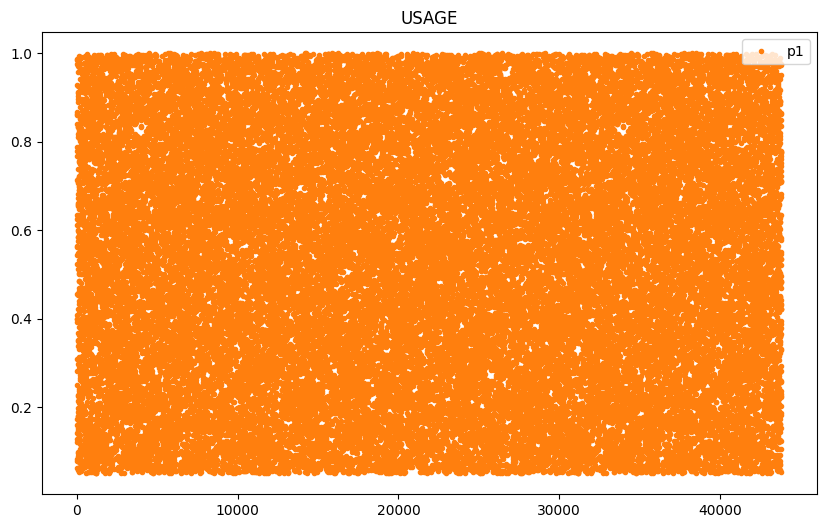

In [ ]:
import seaborn as sns
color_palette = sns.color_palette()

plt.figure(figsize=(10, 6))
df['p1'].plot(style='.', color=color_palette[1], title='USAGE', label='p1')
# df['ds'].plot(style='.', color=color_palette[2], label='ds')
plt.legend()
plt.show()

In [ ]:
print(df['ds'].dtype)


datetime64[ns]


In [ ]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')


In [ ]:
print(df['ds'].dtype)


datetime64[ns]


In [ ]:
def create_features(df, label):
    df['ds'] = pd.to_datetime(df['ds'], errors='coerce')  # Convert to datetime
    df['year'] = df['ds'].dt.year  # Example usage of .dt accessor
    df['month'] = df['ds'].dt.month
    X = df.drop(columns=[label])
    y = df[label]
    return X, y


In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    # df['ds'] = df.index
    # df['hour'] = df['ds'].dt.hour
    # df['dayofweek'] = df['ds'].dt.dayofweek
    # df['weekday'] = df['ds'].dt.day_name()
    # df['weekday'] = df['weekday'].astype(cat_type)
    # df['quarter'] = df['ds'].dt.quarter
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['dayofmonth'] = df['ds'].dt.day
    # df['weekofyear'] = df['ds'].dt.weekofyear
    df['date_offset'] = (df.ds.dt.month*100 + df.ds.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['month','year',
           'dayofyear','dayofmonth',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='ds')
features_and_target = pd.concat([X, y], axis=1)

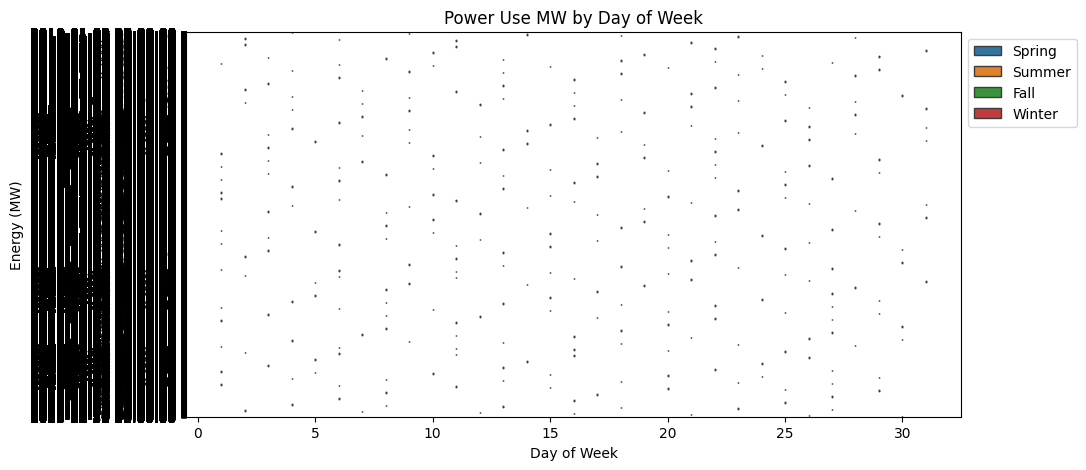

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='dayofmonth',
            y='ds',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x600 with 0 Axes>

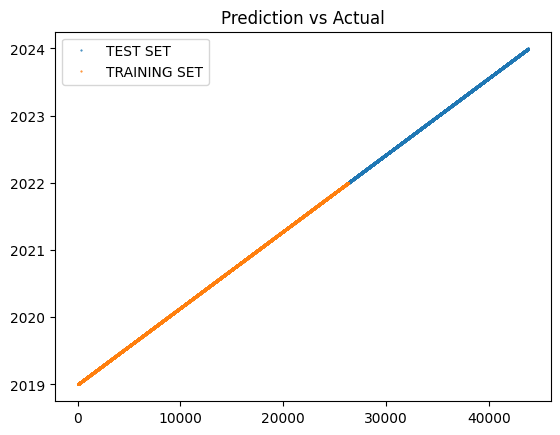

In [ ]:
import matplotlib.pyplot as plt
from os import rename

split_date = '2022-01-01'
df_train = df[df['ds'] <= split_date].copy()
df_test = df[df['ds'] > split_date].copy()

df_test_renamed = df_test.rename(columns={'ds': 'TEST SET'})
df_train_renamed = df_train.rename(columns={'ds': 'TRAINING SET'})

df_merged = df_test_renamed.join(df_train_renamed, how='outer', lsuffix='_test', rsuffix='_train')

plt.figure(figsize=(10, 6))
df_merged[['TEST SET', 'TRAINING SET']].plot(style='.', ms=1)
plt.title('Prediction vs Actual')
plt.show()

In [ ]:
%%time
model = Prophet()
model.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp296ew79a/v0jv8y8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp296ew79a/zwzr9zyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87203', 'data', 'file=/tmp/tmp296ew79a/v0jv8y8x.json', 'init=/tmp/tmp296ew79a/zwzr9zyi.json', 'output', 'file=/tmp/tmp296ew79a/prophet_model_1ke_um8/prophet_model-20240827080516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 2.48 s, sys: 83.3 ms, total: 2.56 s
Wall time: 6.69 s


In [ ]:
test_forecast = model.predict(df_test)

In [ ]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 01:00:00,0.362547,-0.280678,0.991945,0.362547,0.362547,0.007633,0.007633,0.007633,0.006682,...,-0.005515,-0.005515,-0.005515,0.006467,0.006467,0.006467,0.0,0.0,0.0,0.370180
1,2022-01-01 02:00:00,0.362547,-0.232660,1.002224,0.362547,0.362547,0.005806,0.005806,0.005806,0.005456,...,-0.006104,-0.006104,-0.006104,0.006454,0.006454,0.006454,0.0,0.0,0.0,0.368354
2,2022-01-01 03:00:00,0.362547,-0.282413,0.954699,0.362547,0.362547,0.002672,0.002672,0.002672,0.002906,...,-0.006676,-0.006676,-0.006676,0.006442,0.006442,0.006442,0.0,0.0,0.0,0.365219
3,2022-01-01 04:00:00,0.362547,-0.246704,0.963054,0.362547,0.362547,-0.000923,-0.000923,-0.000923,-0.000123,...,-0.007229,-0.007229,-0.007229,0.006429,0.006429,0.006429,0.0,0.0,0.0,0.361624
4,2022-01-01 05:00:00,0.362548,-0.293232,0.985600,0.362548,0.362548,-0.003397,-0.003397,-0.003397,-0.002054,...,-0.007760,-0.007760,-0.007760,0.006416,0.006416,0.006416,0.0,0.0,0.0,0.359150


In [ ]:
test_forecast.isnull().sum()

,0
ds,0
trend,0
yhat_lower,0
yhat_upper,0
trend_lower,0
trend_upper,0
additive_terms,0
additive_terms_lower,0
additive_terms_upper,0
daily,0


In [ ]:
test_forecast['multiplicative_terms'].value_counts()

,count
multiplicative_terms,
0.0,17519


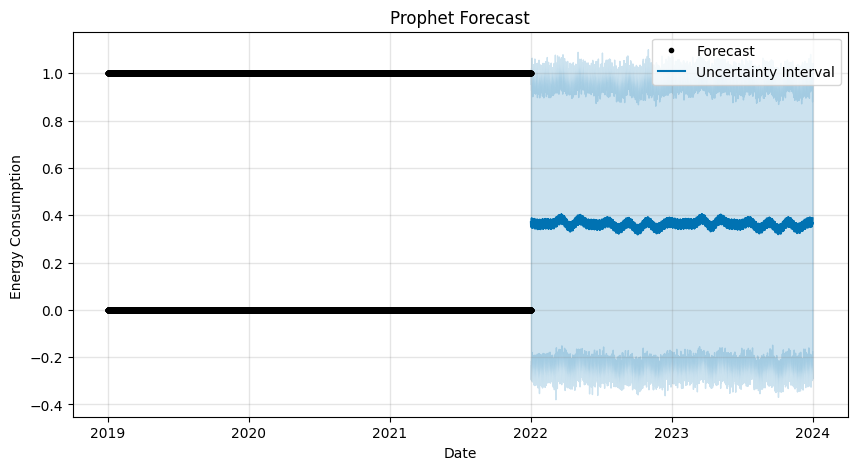

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_forecast, ax=ax)
ax.set_title('Prophet Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption ')
plt.legend(['Forecast', 'Uncertainty Interval'])
plt.show()